# Your Name Here

## Research question/interests


The purpose is to find how major events cause changes to the overall grades. Events such as the pandemic shutdown of in-person classes and busdriver strikes. Also I'm curious if it is possible to see that there is some sort of event during a semester based off the grades alone without prior knowledge of the event. 

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns 
import os
import glob
import csv

datafile = pd.read_csv(r'C:\Users\crisp\301\project-group27\data\raw\All_Data.csv')
datafile




C:\Users\crisp\AppData\Local\Temp\ipykernel_5996\1341494383.py:9: DtypeWarning: Columns (3,6,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  datafile = pd.read_csv(r'C:\Users\crisp\301\project-group27\data\raw\All_Data.csv')


,Source.Name,SourceFile,Campus,Year,Session,Subject,Course,Remove,Section,Title,...,'50-54,'55-59,'60-63,'64-67,'68-71,'72-75,'76-79,'80-84,'85-89,'90-100
0,DataUBC.csv,Source File,Campus,Year,Session,Subject,Course,Column6,Section,Title,...,50-54,55-59,60-63,64-67,68-71,72-75,76-79,80-84,85-89,90-100
1,DataUBC.csv,UBC-1996S-ADED.csv,UBC,1996,S,ADED,327,,98B,INST TECH TEA AD,...,0,0,0,0,0,0,0,0,0,0
2,DataUBC.csv,UBC-1996S-ADED.csv,UBC,1996,S,ADED,327,,GIS,INST TECH TEA AD,...,0,0,0,0,0,0,0,1,3,6
3,DataUBC.csv,UBC-1996S-ADED.csv,UBC,1996,S,ADED,327,,OVERALL,INST TECH TEA AD,...,0,0,0,0,0,0,0,1,3,6
4,DataUBC.csv,UBC-1996S-ADED.csv,UBC,1996,S,ADED,328,,OVERALL,INSTIT ADULT ED,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364076,DataUBCOFull.csv,UBCO-2021W-WRLD.csv,UBCO,2021,W,WRLD,360,NaN,OVERALL,Literature and Power,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364077,DataUBCOFull.csv,UBCO-2021W-WRLD.csv,UBCO,2021,W,WRLD,370,NaN,001,Story and Image Across the Islamic World,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364078,DataUBCOFull.csv,UBCO-2021W-WRLD.csv,UBCO,2021,W,WRLD,370,NaN,OVERALL,Story and Image Across the Islamic World,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364079,DataUBCOFull.csv,UBCO-2021W-WRLD.csv,UBCO,2021,W,WRLD,480,NaN,001,Modern Japanese Literature and the Invention o...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Milestone 3
Task 1

In [193]:
datafile.shape


(364081, 37)

In [194]:
datafile.head()

,Source.Name,SourceFile,Campus,Year,Session,Subject,Course,Remove,Section,Title,...,'50-54,'55-59,'60-63,'64-67,'68-71,'72-75,'76-79,'80-84,'85-89,'90-100
0,DataUBC.csv,Source File,Campus,Year,Session,Subject,Course,Column6,Section,Title,...,50-54,55-59,60-63,64-67,68-71,72-75,76-79,80-84,85-89,90-100
1,DataUBC.csv,UBC-1996S-ADED.csv,UBC,1996,S,ADED,327,,98B,INST TECH TEA AD,...,0,0,0,0,0,0,0,0,0,0
2,DataUBC.csv,UBC-1996S-ADED.csv,UBC,1996,S,ADED,327,,GIS,INST TECH TEA AD,...,0,0,0,0,0,0,0,1,3,6
3,DataUBC.csv,UBC-1996S-ADED.csv,UBC,1996,S,ADED,327,,OVERALL,INST TECH TEA AD,...,0,0,0,0,0,0,0,1,3,6
4,DataUBC.csv,UBC-1996S-ADED.csv,UBC,1996,S,ADED,328,,OVERALL,INSTIT ADULT ED,...,0,0,0,0,0,0,0,1,0,1


In [195]:
datafile.columns

Index(['Source.Name', 'SourceFile', 'Campus', 'Year', 'Session', 'Subject',
       'Course', 'Remove', 'Section', 'Title', 'Professor', 'Enrolled',
       'Average', 'Std Dev', 'High', 'Low', 'Pass', 'Fail', 'Withdrew',
       'Audit', 'Other', ''0-9', ''10-19', ''20-29', ''30-39', ''40-49', '<50',
       ''50-54', ''55-59', ''60-63', ''64-67', ''68-71', ''72-75', ''76-79',
       ''80-84', ''85-89', ''90-100'],
      dtype='object')

In [196]:
datafile.nunique(axis=0)

Source.Name        3
SourceFile      8994
Campus             4
Year              35
Session            3
Subject          367
Course          1133
Remove            32
Section         1502
Title          15936
Professor      21487
Enrolled        1998
Average        16512
Std Dev        18066
High             293
Low              297
Pass            1758
Fail             356
Withdrew         194
Audit            127
Other            785
'0-9             167
'10-19           184
'20-29           193
'30-39           241
'40-49           292
<50              386
'50-54           286
'55-59           357
'60-63           338
'64-67           379
'68-71           458
'72-75           474
'76-79           454
'80-84           524
'85-89           390
'90-100          394
dtype: int64

In [182]:
datafile.Other.unique()

array(['Other', '4', '1', '6', '5', '10', '2', '3', '11', '0', '15', '16',
       '9', '12', '8', '30', '32', '70', '13', '151', '21', '22', '58',
       '36', '79', '7', '17', '74', '14', '35', '18', '24', '25', '34',
       '19', '38', '26', '31', '45', '48', '37', '41', '42', '23', '33',
       '50', '29', '122', '28', '27', '59', '20', '102', '61', '49', '43',
       '54', '55', '44', '64', '56', '51', '160', '69', '656', '529',
       '123', '314', '325', '47', '86', '39', '117', '128', '40', '52',
       '53', '281', '395', '816', '220', '211', '188', '818', '405',
       '421', '257', '132', '407', '394', '412', '221', '184', '431',
       '66', '57', '65', '112', '83', '77', '75', '88', '120', '119',
       '121', '98', '105', '189', '178', '115', '124', '67', '71', '80',
       '63', '60', '111', '114', '62', '104', '87', '76', '137', '631',
       '642', '534', '172', '317', '334', '46', '85', '173', '131', 3, 0,
       8, 2, 5, 7, 1, 4, 12, 38, 43, 11, 6, 18, 51, 23, 30, 24,

Numbers in the other column doesn't matter to the overall data

In [183]:
datafile.Campus.unique()

array(['Campus', 'UBC', 'UBCO', 'UBCV'], dtype=object)

Campus works but we have to combine UBC and UBCV as that was a typing error because it is to mean the same campus

In [184]:
datafile.Year.unique()

array(['Year', '1996', '1997', 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, '2017', '2018', '2021', '2022', '2014', '2015',
       '2016', '2019', '2020', 2020, 2021], dtype=object)

With this particuler piece of data it shows all the years that the data encompasses. It is useful to show the year for plotting the data year after year 

In [185]:
datafile.Subject.unique()

array(['Subject', 'ADED', 'AGEC', 'ANAT', 'ANSC', 'ANTH', 'APSC', 'ARCH',
       'ARST', 'ARTE', 'ASIA', 'ASTR', 'ATSC', 'AUDI', 'BA  ', 'BAAC',
       'BABS', 'BAEN', 'BAFI', 'BAHR', 'BAIM', 'BAIT', 'BAMA', 'BAPA',
       'BASM', 'BATL', 'BAUL', 'BIOC', 'BIOE', 'BIOL', 'BOTA', 'BUED',
       'CHEM', 'CHIN', 'CHML', 'CIVL', 'CLST', 'CNPS', 'COMM', 'CPSC',
       'CRWR', 'CSED', 'CUST', 'DENT', 'EADM', 'ECED', 'ECON', 'EDCI',
       'EDST', 'EDUC', 'ELEC', 'ENED', 'ENGL', 'EPSE', 'FILM', 'FINA',
       'FMPR', 'FMSC', 'FMST', 'FOOD', 'FREN', 'FRST', 'GENE', 'GEOG',
       'GEOL', 'GEOP', 'GEPA', 'GERM', 'HCEP', 'HIED', 'HIST', 'HKIN',
       'HMED', 'HUNU', 'INDS', 'ITAL', 'JAPN', 'LANE', 'LATN', 'LAW ',
       'LIBE', 'LIBR', 'LING', 'MAED', 'MATH', 'MECH', 'MEDG', 'MEDI',
       'MICB', 'MLED', 'MMAT', 'MMPE', 'MRNE', 'MUED', 'MUSC', 'NRSC',
       'NURS', 'OBST', 'OCCH', 'OCGY', 'ORBI', 'PATH', 'PCTH', 'PHAR',
       'PHIL', 'PHYS', 'PLAN', 'PLNT', 'POLI', 'PSYC', 'PUNJ', 'READ',
   

This data is useful for figuring out which courses have the greatest disparity between years compared to others

# Graph 1
This graph shows the occurance of each year in the dataset which is interesting because if examined it will show which years had the most courses as data. It isn't pretty but it does show all the years with courses. 

<AxesSubplot:title={'center':'Courses per Year'}, xlabel='count', ylabel='Year'>

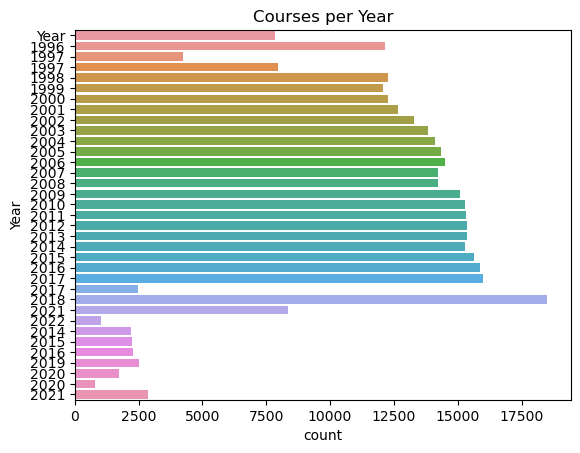

In [186]:
plt.title('Courses per Year')

year = datafile[['Year']]
year.head

sns.countplot(data=year,y='Year')


# Task 2: Data Analysis Pipeline
1. Load Data
2. Clean Data
3. Test New Datafile


Cleaning data
- Remove all coluumns that I don't need
    - Basic ones with useless data removed
    - Std dev removed because unknown data
    - Audit removed because it is unneeded for data analysis
- Remove all rows I don't need or that are messed up
    - Simply needed to get rid of the row that was a duplicate of the titles for each column

In [191]:
from distutils.command import clean


clean_data = datafile.copy().drop(['Remove', 'Source.Name','SourceFile', 'Other', 'Std Dev', 'Audit'], axis=1)
clean_data = clean_data.drop(clean_data[clean_data.Campus == 'Campus'].index)

clean_data.nunique()
clean_data.Campus.unique()


array(['UBC', 'UBCO', 'UBCV'], dtype=object)

Well the data was cleaned up a lot and I removed all rows which had one of the column titles in it. Lets take a look at it now  

TypeError: 'value' must be an instance of str or bytes, not a int

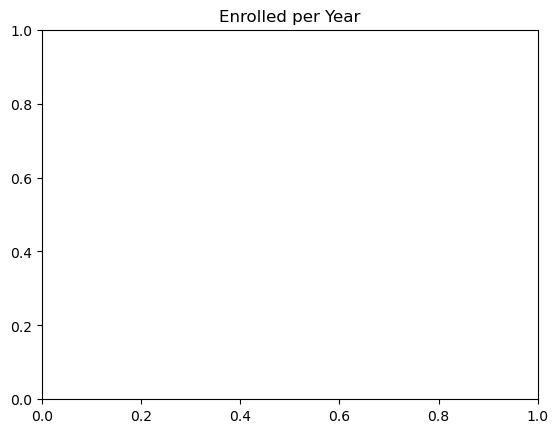

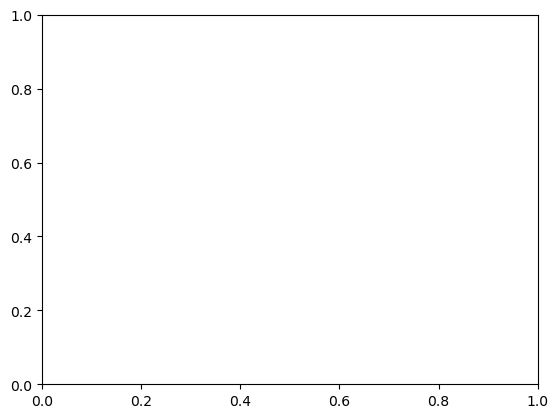

In [188]:
plt.title('Enrolled per Year')

clean_data.plot(kind='scatter', x='Enrolled', y='Year')


#sns.scatterplot(data=clean_data, x='Enrolled', y='Year')

Ok that is really rough looking but it does work. Lets try limiting it

<AxesSubplot:xlabel='Enrolled', ylabel='Year'>

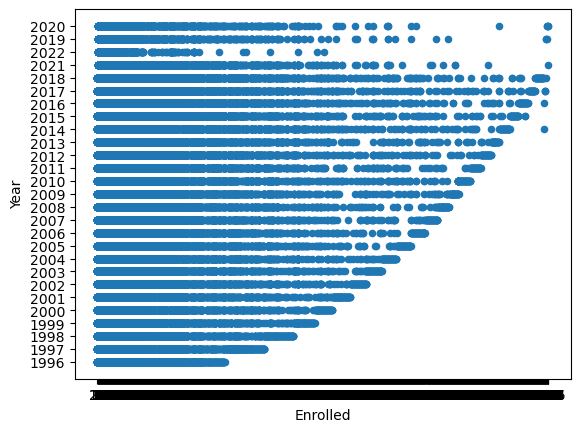

In [ ]:

year = clean_data[['Year']]


clean_data.plot(kind='scatter', x='Enrolled', y='Year')


# Task 3: Method Chaining